You can find dataset description here https://archive.ics.uci.edu/ml/datasets/Student+Performance. Data is in "Data Folder" name "student.zip"

## How to complete this assignment

First download the data and extract two tables from the link above. Then complete 9 graded tasks below, the score is given in brackets. Finally submit the resulting `.ipynb` file to rs-app Auto-test.
- **Do not delete or rename the variables** given before the inscription '#your code here', they are needed for correct verification.
- **Do not change the code** in the last Notebook cell, it is required for server side.
- Your **Notebook must run completely without errors** in order to be graded! Please check everything before submission by going _Cell_ -> _Run All_

## Here goes!

### Import necessary libraries 

In [2]:
import pandas as pd

### Read the data

In [3]:
mat = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

### Look at first five rows of table with students math grades. In all other tasks, unless otherwise stated, we use it.

In [244]:
mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Task 1 (0.25 points).** Count number of boys and girls in the dataset.

In [245]:
boys, girls = mat[mat['sex'] == 'M'].shape[0], mat[mat['sex'] == 'F'].shape[0]

**Task 2 (0.25 points).** Count number of 17 year old students having math grade G3 between 10 and 15 inclusively 

In [246]:
students_17_year_old = mat[(mat['age'] == 17) & (mat['G3'] <= 15) & (mat['G3'] >= 10)].shape[0]

**Task 3 (0.5 points).** List top-10 students having biggest average grade (G1, G2, G3)  in math. Count number of boys from that list.

In [247]:
mat_copy = mat.copy()
mat_copy['avg'] = mat_copy[['G1','G2', 'G3']].mean(axis=1)
mat_copy.sort_values(by='avg',ascending=False, inplace=True)
top_10 = mat_copy[0:10]
boys_from_top_10 = top_10[mat['sex'] == 'M'].count()[0]

<ipython-input-247-c5c8badb80f7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boys_from_top_10 = top_10[mat['sex'] == 'M'].count()[0]


**Task 4 (1 point).** Count mean and standard deviation of absences for students with romantic relationship and access to internet

In [248]:
mean = mat.absences[(mat['internet'] == 'yes') & (mat['romantic'] == 'yes')].mean()
std = mat.absences[(mat['internet'] == 'yes') & (mat['romantic'] == 'yes')].std()

**Task 5 (1.5 points).** Count number of students for each existing age. Return list with counts sorted by students age in ascending order.

Note: On 0 index in list we have number of 15 year old students, on 1st index number of 16 year old students, ...

In [249]:
student_counts_for_each_age = mat['age'].value_counts().sort_index().tolist()

**Task 6* (2 points).** Find most frequent pair (Fjob, Mjob) of students from math grade table.

Note 1: Do not take student into account if at least one of parents job name is "other". <br>
Note 2: Pairs (Fjob: teacher, Mjob: at_home) and (Fjob: at_home, Mjob: teacher) are different and their occurrences should be counted separately.

Hint: groupby (Fjob, Mjob), count rows, descending sort by count, reset_index, take first row values.

In [250]:
t = mat[(mat['Fjob'] != 'other') & (mat['Mjob'] != 'other')].groupby(['Fjob', 'Mjob']).size()\
    .sort_values(ascending=False).keys()[0]
father, mother = t

**Task 7 (1 point).** Count number of students presenting both in mat and por tables.

_Note 1_: That's a pity that tables haven't foreign keys for joining together. The uniqueness of the student is determined by the uniqueness of the set of all fields except subject fields (G1, G2, G3). <br>
_Note 2_: Finally you'd better to come up with table having all student personal information and non-null grades in math ["G1_mat", "G2_mat", "G3_mat"] and ["G1_por", "G2_por", "G3_por"]. Joined dataframe could be helpful for further usage. <br>
Note 3: probably you would like to use "merge" to avoid duplicating column names from right and left dataframe.

In [251]:
both_present = pd.merge(mat, por, how = 'inner', on=mat.columns[0:30].tolist(), suffixes=('_mat', '_por')).shape[0]

In [252]:
mat_por = pd.merge(mat, por, how = 'inner', on=mat.columns[0:30].tolist(), suffixes=('_mat', '_por'))

**Task 8 (1.5 points).** Find absolute differences between average mat and por student final grades for each school (GP & MS)

In [4]:
GP_diff, MS_diff = (mat.groupby('school')['G3'].mean() - por.groupby('school')['G3'].mean()).abs()

**Task 9* (2 points).** Find top-5 linearly dependent pairs of numeric student features from mat table.

_Note 1_: Use absolute Peason correlation value for measuring the linear relationship between features.

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficients, but the most popular is Pearson’s. It can take value from -1 to 1 inclusive. 
 - A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
 - A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
 - Zero means that for every increase of one variable we do not expect always increase or decrease of another variable. It is not a proof, that variables are not related with each other. That only means NO LINEAR relationship between them. Suppose we have variables x and y connected by a sinusoidal law $y=sin(x)$. There is obvious no linear relationship between them (for $x \in [0, \frac{\pi}{2}]$ y increases unevenly ant later for $x \in [\frac{\pi}{2}, \pi]$ y decreases unevenly). Even though they relate to each other by more complex law.
 
More mathematical explanation https://en.wikipedia.org/wiki/Correlation_and_dependence.

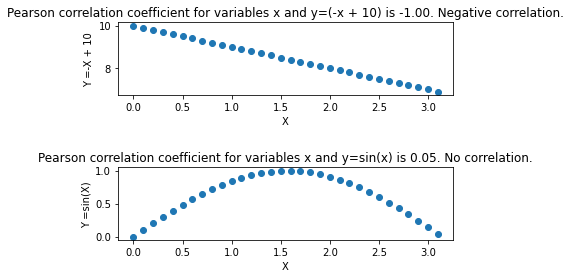

In [254]:
# Just a short example
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array(np.arange(0, 314, 10)) / 100
y1 = -x + 10
y2 = np.sin(x)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x, -x + 10)
ax1.set_title("Pearson correlation coefficient for variables x and y=(-x + 10) is %.2f. Negative correlation."
      % np.corrcoef(x, y1)[0][1])
ax1.set_xlabel("X")
ax1.set_ylabel("Y =-X + 10")
ax2.scatter(x, y2)
ax2.set_title("Pearson correlation coefficient for variables x and y=sin(x) is %.2f. No correlation."
      % np.corrcoef(x, y2)[0][1])
ax2.set_xlabel("X")
ax2.set_ylabel("Y =sin(X)")

plt.subplots_adjust(hspace=1.0)
plt.show()

_Note 2_: Use Pandas _.corrcoef_  for calculating Pearson correlation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html. Return list of lists of column name pairs by absolute correlation value in descending order. Each pair of names should follow the alphabet order.

In [255]:
cor_matrix = mat.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
pairs = upper_tri.unstack().sort_values(ascending=False)[0:5].keys()
top5_correlations = []
for pair in pairs:
    top5_correlations.append(sorted(list(pair)))

**Task 10 (bonus no grading).** Plot 5 scatterplots showing relationship between most correlated pairs of variables from the previous task.

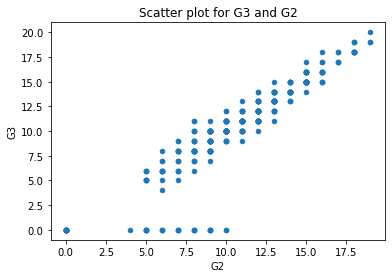

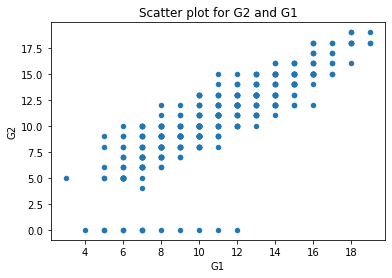

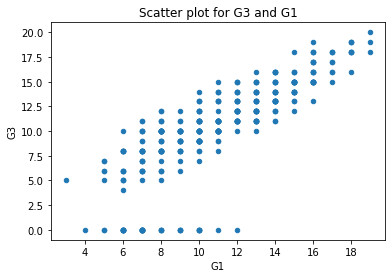

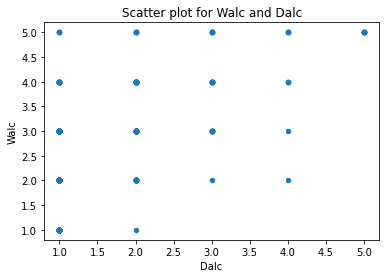

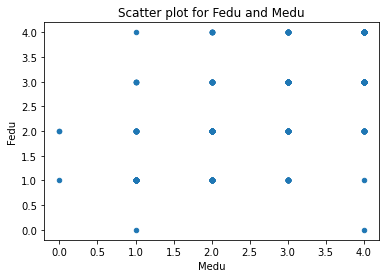

In [261]:
for pair in pairs:
    mat.plot.scatter(x=pair[1], y=pair[0], title= f"Scatter plot for {pair[0]} and {pair[1]}"); 

### Warning! Do not change anything in this area.

In [256]:
with open('student_answers.txt', 'w') as file:
    file.write(f"{boys} {girls}\n")
    file.write(f"{students_17_year_old}\n")
    file.write(f"{boys_from_top_10}\n")
    file.write(f"{round(mean, 3)} {round(std, 3)}\n")
    file.write(f"{student_counts_for_each_age}\n")
    file.write(f"{father} {mother}\n")
    file.write(f"{both_present}\n")
    file.write(f"{round(GP_diff, 3)} {round(MS_diff, 3)}\n")
    file.write(f"{top5_correlations}")